#### QUIZ 2: PROGRAMACIÓN LINEAL VIERNES 17 DE SEPTIEMBRE

# Ajuste de curvas (Regresión)


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot


In [2]:
# Encontrar \beta_0 y \beta_1 resolviendo el sistema


#Matriz inversa de A


In [3]:
# Graficar la recta encontrada junto con los puntos
#Definir puntos


#Crear la figura y definir el tamaño


#Graficar puntos y la recta ajustada


2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir matriz A y vector b
A = np.array([
    [1, 1, 1],
    [1, 0, 0],
    [1, 2, 4]
])

b = np.array([0, 1, 1])

# Inversa de A
A1 = np.linalg.inv(A)

# Encontrar \beta_0, \beta_1 y \beta_2 resolviendo el sistema

# \beta = inv(A)*b
#beta = A1.dot(b)
beta = A1@b # @: Multiplicación matriz - vector

# Soluión \beta
beta

array([ 1., -2.,  1.])

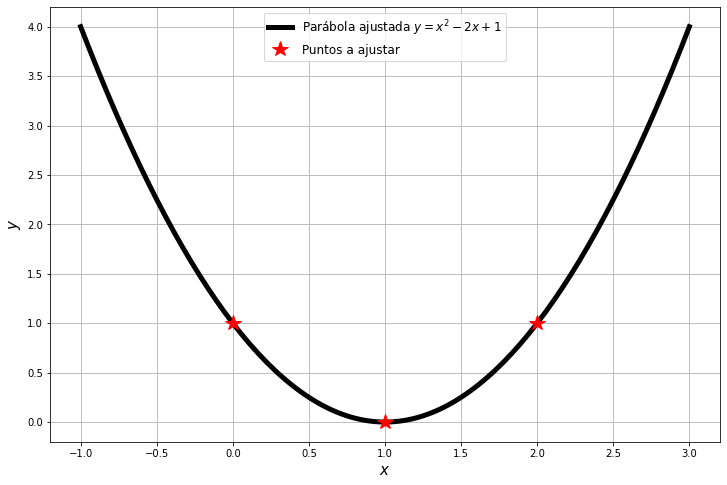

In [5]:
#Definir la función
def y(x):
    return x**2-2*x+1

# La tabulación para la parábola
xnum = np.linspace(-1, 3, 145)
ynum = y(xnum)


# Coordenadas de los puntos a ajustar (0,1) - (1,0) - (2,1)
x = [0, 1, 2]
y = [1, 0, 1]


# Generar gráficos
plt.figure(figsize=(12, 8))

# Graficar la parabola junto con los puntos
plt.plot(xnum, ynum, 'k', lw=5, label='Parábola ajustada $y=x^2-2x+1$')
plt.plot(x, y, '*r', ms=16, label = 'Puntos a ajustar')

# Etiquetas de los ejes coordenados
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.legend(loc='best', fontsize=12)
plt.grid()
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [6]:
# Crear un conjunto de puntos ruidosos a partir de una recta
x = np.linspace(0,1,50)
y = 6*x + 4 + np.random.randn(50)

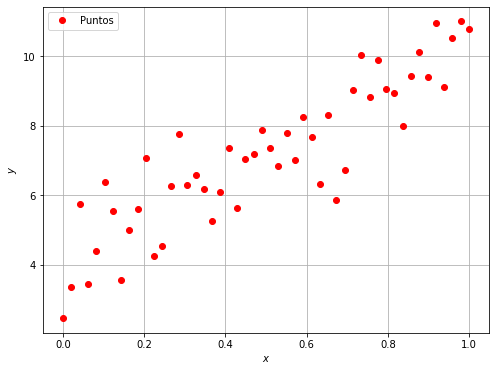

In [7]:
# Graficar
plt.figure(figsize=(8,6))

plt.plot(x,y,'or',label='Puntos')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid()
plt.legend(loc='best')
plt.show()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿por qué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [8]:
import scipy.optimize as opt

In [9]:
# Función minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como `{'ineq': g_i, 'eq': h_j}`.

Primero debemos construir la función objetivo y la semilla inicial:

In [10]:
# Se vuelven a definir los puntos ruidosos
x, y

(array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
 array([ 2.47200153,  3.37488184,  5.74403982,  3.46136538,  4.40814093,
         6.38488861,  5.5476319 ,  3.57038502,  4.98652925,  5.60704354,
         7.06418873,  4.2414788 ,  4.54187818,  6.27211384,  7.76521236,
         6.2839647 ,  6.5766332 ,  6.19106366,  5.26420987,  6.08442254,
         7.35903141,  5.62

In [11]:
# Definimos función objetivo (Funcional de costo). 
# Suma de los errores al cuadrado
def f0(beta, x, y):
    yhat = beta[1]*x + beta[0]
    e = y - yhat
    sum_e = np.sum(e**2)
    return sum_e

# Definimos el beta inicial x0
beta_inicial = np.zeros(2)

In [12]:
#Obtener resultado con la función minimize
#obj: Función objetivo
#beta_inicial: Valores iniciales de los parámetros beta
# args: Puntos dados en el problema
sol1 = opt.minimize(f0, beta_inicial, args=(x, y))

In [13]:
# Mostrar
sol1

      fun: 46.18421572237449
 hess_inv: array([[ 0.03903983, -0.05802099],
       [-0.05802099,  0.11594017]])
      jac: array([-9.53674316e-07,  1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([3.99259141, 6.33733765])

¿Qué tan bien luce el ajuste?

In [14]:
# Coeficientes \beta_0 y \beta_1
beta = sol1.x
beta

array([3.99259141, 6.33733765])

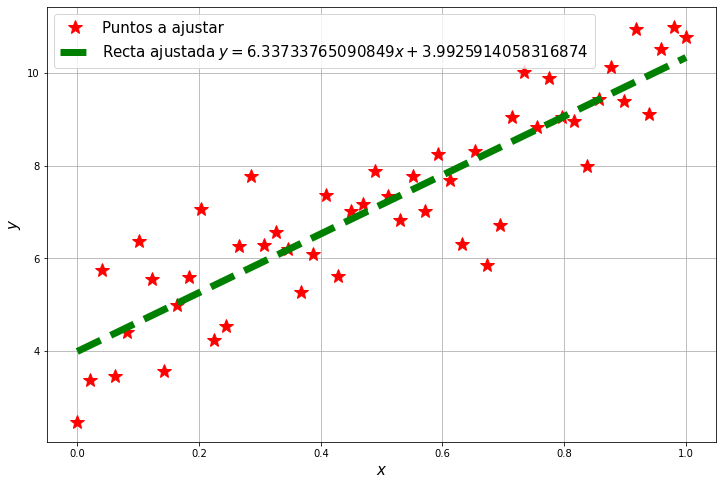

In [15]:
#Definir recta ajustada
# NOTAR QUE EL VECTOR x ES EL MISMO x DE LOS PUNTOS RUIDOSOS (x, y)
yhat = beta[1]*x + beta[0] 

# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(12,8))

plt.plot(x, y, '*r', ms=15, label='Puntos a ajustar')
plt.plot(x, yhat, '--g', lw = 7, label=f'Recta ajustada $y ={beta[1]}x+{beta[0]}$')


plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.legend(loc='best', fontsize=15)
plt.grid()
plt.show()

Note que la pendiente es aproximadamente $6$ y el intercepto es aproximadamente $4$.

La anterior idea se puede extender a ajuste polinomial... Pero antes veamos el siguiente inconveniente.

## 1.1. Preprocesamiento de los datos

+ ### Escalado de características (Feature scaling)

<img style="float: left; margin: 0px 0px 15px 15px;" src="http://drive.google.com/uc?id=1EeaiHaj7n6qUfek5uqdepLKFJ54Vtpwj" width="250px" height="125px"/>

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://predictivehacks.com/wp-content/uploads/2020/08/2d_euclidean_distance_illustration.png" width="450px" height="125px"/>


In [16]:
(44, 72000), (37, 67000)

((44, 72000), (37, 67000))

In [17]:
(37-44)**2, (67000-72000)**2

(49, 25000000)

**1. Estandarización**

$$x_{stand} = \frac{x- \text{mean(x)}}{\text{std}(x)}$$

**2. Normalización**

$$x_{norm} = \frac{x- \min(x)}{\max(x)- \min(x)}$$

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

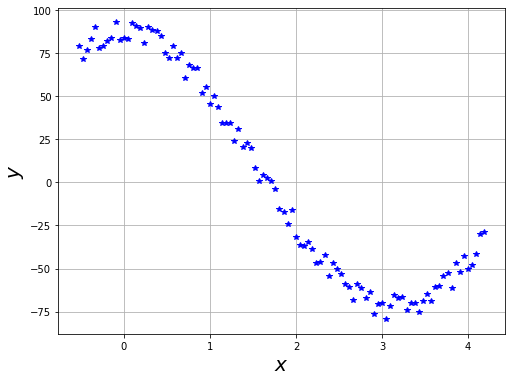

In [18]:
# Generamos 100 puntos ruidosos a partir de una senoidal
n = 100
x = np.linspace(-np.pi/6,4*np.pi/3,n)
y = 80*np.cos(x) + 15*np.random.rand(n)

#Graficamos los puntos
plt.figure(figsize=(8,6))
plt.plot(x,y,'*b')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.show()

In [19]:
# Preprocesamiento de los datos
xnorm = (x-min(x))/(max(x)-min(x))
ynorm = (y-min(y))/(max(y)-min(y))

xnorm, ynorm

(array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

In [20]:
#Graficamos los puntos


### 2.1. ¿Se ajustará bien una recta?

In [21]:
# Definir funcion objetivo y condición inicial (semilla)
def obj1(beta, x, y):
    yhat = beta[1]*x + beta[0]
    e = y - yhat
    sum_e = np.sum(e**2)
    return sum_e

beta_inicial = np.zeros(2)

In [22]:
# Resolver
sol1 = opt.minimize(obj1, beta_inicial, args=(xnorm, ynorm))
sol1

      fun: 1.7578324235491023
 hess_inv: array([[ 0.01970297, -0.02940594],
       [-0.02940594,  0.05881188]])
      jac: array([-2.98023224e-08,  4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 1.03426959, -1.12728758])

**Veamos $\beta$ para el ajuste con recta**

In [23]:
# Mostrar coeficientes
beta1 = sol1.x
beta1

array([ 1.03426959, -1.12728758])

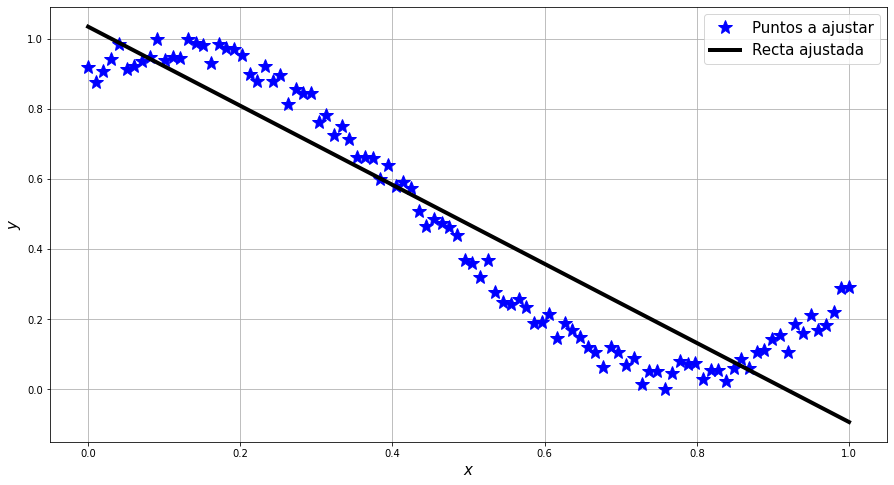

In [24]:
# Generar "curva" ajusta
yhat1 = beta1[1]*xnorm + beta1[0]


# Generar gráfico
plt.figure(figsize=(15,8))

#Agregar puntos y recta ajustada
plt.plot(xnorm, ynorm, '*b', ms=15, label='Puntos a ajustar')
plt.plot(xnorm, yhat1, 'k', lw=4, label='Recta ajustada')

# Etiquetas de los ejes
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)


plt.grid()
plt.legend(loc='best', fontsize=15)
plt.show()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [25]:
# Definir funcion objetivo y condición inicial (semilla)
def obj2(beta, x, y):
    yhat = beta[2]*x**2 + beta[1]*x + beta[0]
    e = y - yhat
    sum_e = np.sum(e**2)
    return sum_e

beta_inicial = np.zeros(3)

In [26]:
# Resolver
sol2 = opt.minimize(obj2, beta_inicial, args=(xnorm, ynorm))
sol2

      fun: 1.3202083960253668
 hess_inv: array([[ 0.04259274, -0.16893333,  0.1398874 ],
       [-0.16893333,  0.90834497, -0.85128278],
       [ 0.1398874 , -0.85128278,  0.85283492]])
      jac: array([ 8.94069672e-08, -3.12924385e-07, -1.63912773e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([ 1.17782036, -1.997381  ,  0.87009339])

**Veamos $\beta$ para el ajuste con parábola**

In [27]:
# Mostrar coeficientes
beta2 = sol2.x
beta2

array([ 1.17782036, -1.997381  ,  0.87009339])

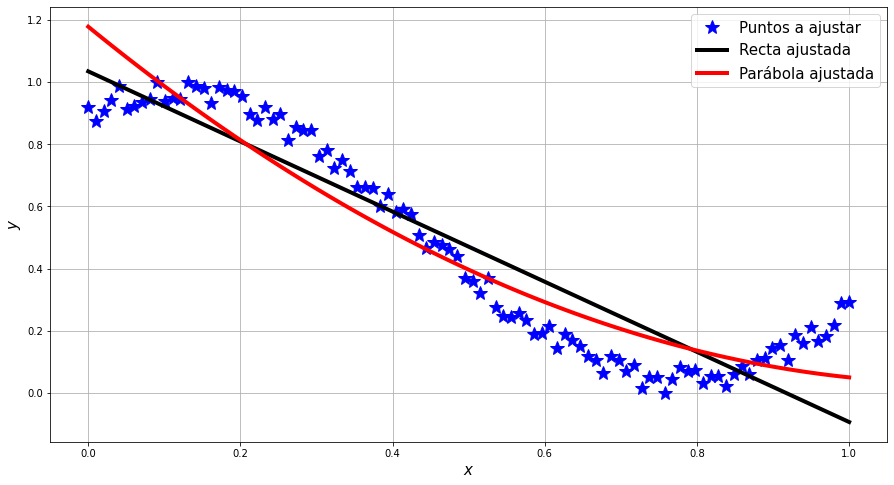

In [28]:
# Generar curva ajusta
yhat2 = beta2[2]*xnorm**2 + beta2[1]*xnorm + beta2[0]

# Generar gráfico
plt.figure(figsize=(15,8))

#Agregar puntos y recta ajustada
plt.plot(xnorm, ynorm, '*b', ms=15, label='Puntos a ajustar')
plt.plot(xnorm, yhat1, 'k', lw=4, label='Recta ajustada')
plt.plot(xnorm, yhat2, 'r', lw=4, label='Parábola ajustada')

# Etiquetas de los ejes
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.grid()
plt.legend(loc='best', fontsize=15)
plt.show()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [29]:
# Definir funcion objetivo y semilla
def obj3(beta, x, y):
    yhat = beta.dot([x**i for i in range(4)]) # Es equivalente a beta3*x**3 + beta2*x**2 + ....
    e = y- yhat
    sum_e = np.sum(e**2)
    return sum_e

beta_inicial = np.zeros(4)

In [30]:
# Resolver
sol3 = opt.minimize(obj3, beta_inicial, args=(xnorm, ynorm))
sol3

      fun: 0.08739719021145347
 hess_inv: array([[  0.07429352,  -0.55471303,   1.10399175,  -0.64071659],
       [ -0.55471303,   5.61702182, -12.65251013,   7.86011567],
       [  1.10399175, -12.65251013,  30.47091439, -19.74313279],
       [ -0.64071659,   7.86011567, -19.74313279,  13.16589074]])
      jac: array([-3.75322998e-07,  6.68689609e-07,  7.78585672e-07,  7.31088221e-07])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([ 0.90116793,  1.40830131, -7.68703886,  5.70475475])

**Veamos $\beta$ para el ajuste con cúbica**

In [31]:
# Mostrar coeficientes
beta3 = sol3.x
beta3

array([ 0.90116793,  1.40830131, -7.68703886,  5.70475475])

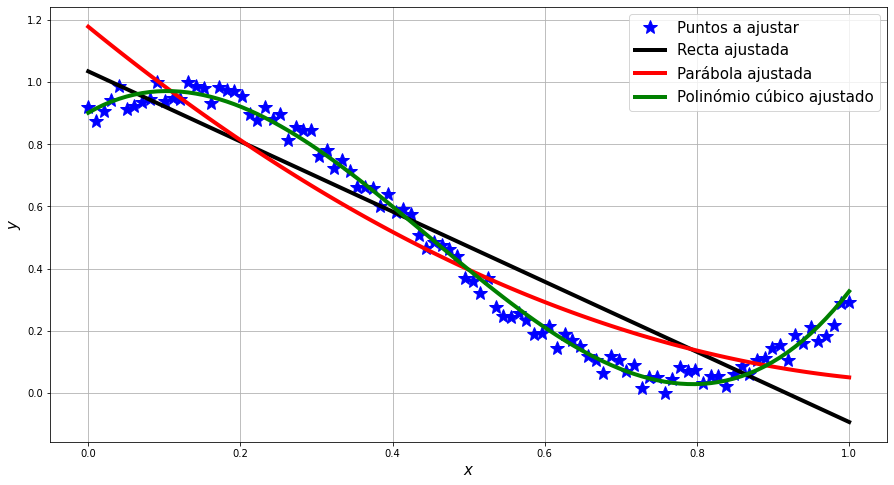

In [32]:
# Generar curva de grado 3 ajusta
# yhat3 = beta3[3]*xnorm**3 + beta3[2]*xnorm**2 + beta3[1]*xnorm + beta3[0]
yhat3 = beta3.dot([xnorm**i for i in range(4)])

# Generar gráfico
plt.figure(figsize=(15,8))

#Agregar puntos y recta ajustada
plt.plot(xnorm, ynorm, '*b', ms=15, label='Puntos a ajustar')
plt.plot(xnorm, yhat1, 'k', lw=4, label='Recta ajustada')
plt.plot(xnorm, yhat2, 'r', lw=4, label='Parábola ajustada')
plt.plot(xnorm, yhat3, 'g', lw=4, label='Polinómio cúbico ajustado')

# Etiquetas de los ejes
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.grid()
plt.legend(loc='best', fontsize=15)
plt.show()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 6...

In [33]:
# Definimos funcion objetivo y semilla
def obj6(beta, x, y):
    yhat = beta.dot([x**i for i in range(7)])
    e = y - yhat 
    sum_e = np.sum(e**2)
    return sum_e

beta_inicial = np.zeros(7)

In [34]:
# Resolvemos
sol6 = opt.minimize(obj6, beta_inicial, args=(xnorm, ynorm))
sol6

      fun: 0.06454246409383549
 hess_inv: array([[ 1.92069802e-01, -4.70207241e+00,  3.58969186e+01,
        -1.21089768e+02,  2.01424774e+02, -1.62077847e+02,
         5.03841025e+01],
       [-4.70207241e+00,  1.62932466e+02, -1.41715402e+03,
         5.12013217e+03, -8.88416187e+03,  7.35343931e+03,
        -2.33185261e+03],
       [ 3.58969186e+01, -1.41715402e+03,  1.31452414e+04,
        -4.93925009e+04,  8.79972000e+04, -7.42283144e+04,
         2.38750852e+04],
       [-1.21089768e+02,  5.12013217e+03, -4.93925009e+04,
         1.90522769e+05, -3.45903560e+05,  2.95969376e+05,
        -9.62638367e+04],
       [ 2.01424774e+02, -8.88416187e+03,  8.79972000e+04,
        -3.45903560e+05,  6.37036284e+05, -5.51215338e+05,
         1.80909519e+05],
       [-1.62077847e+02,  7.35343930e+03, -7.42283144e+04,
         2.95969376e+05, -5.51215338e+05,  4.81294972e+05,
        -1.59147281e+05],
       [ 5.03841025e+01, -2.33185261e+03,  2.38750852e+04,
        -9.62638367e+04,  1.8090951

**De nuevo, veamos $\beta$**

In [35]:
# Mostrar coeficientes
beta6 = sol6.x
beta6

array([  0.89648671,   0.99594466,  -1.14441114, -23.15065918,
        52.7034249 , -42.35851008,  12.34203257])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

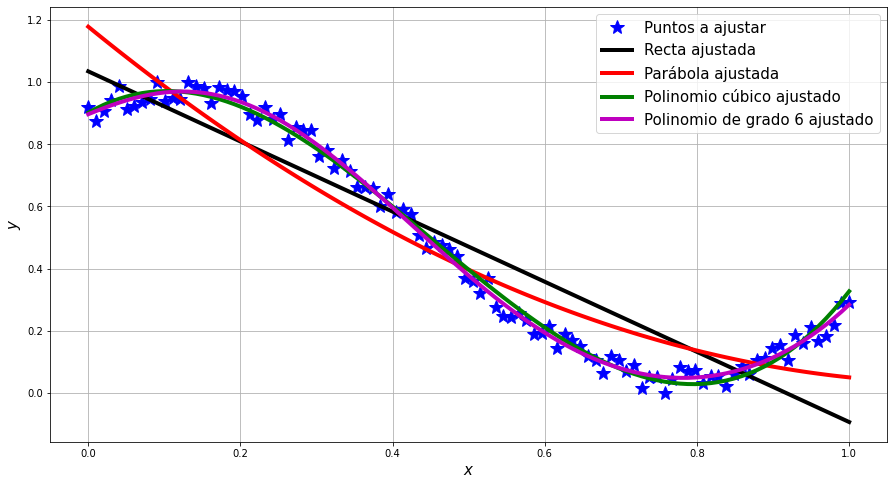

In [36]:
# Generar curva de grado 6 ajusta
yhat6 = beta6.dot([xnorm**i for i in range(7)])

# Generar gráfico
plt.figure(figsize=(15,8))

#Agregar puntos y recta ajustada
plt.plot(xnorm, ynorm, '*b', ms=15, label='Puntos a ajustar')
plt.plot(xnorm, yhat1, 'k', lw=4, label='Recta ajustada')
plt.plot(xnorm, yhat2, 'r', lw=4, label='Parábola ajustada')
plt.plot(xnorm, yhat3, 'g', lw=4, label='Polinomio cúbico ajustado')
plt.plot(xnorm, yhat6, 'm', lw=4, label='Polinomio de grado 6 ajustado')

# Etiquetas de los ejes
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.grid()
plt.legend(loc='best', fontsize=15)
plt.show()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [49]:
# Definir funcion objetivo y semilla
def objn(beta, x, y, n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y - yhat 
    sum_e = np.sum(e**2)
    return sum_e

# Error cuadratico
e_ms = []

for i in range(9):
    # Semilla ó condición inicial
    beta_inicial = np.zeros(i+2)
    sol_n = opt.minimize(objn, beta_inicial, args=(xnorm, ynorm, i+1))
    fun_n = sol_n.fun
    e_ms.append(fun_n)

In [45]:
e_ms

[1.7578324235491023,
 1.3202083960253683,
 0.08739719021145347,
 0.0705575468182631,
 0.06608035813764729,
 0.06454246409383549]

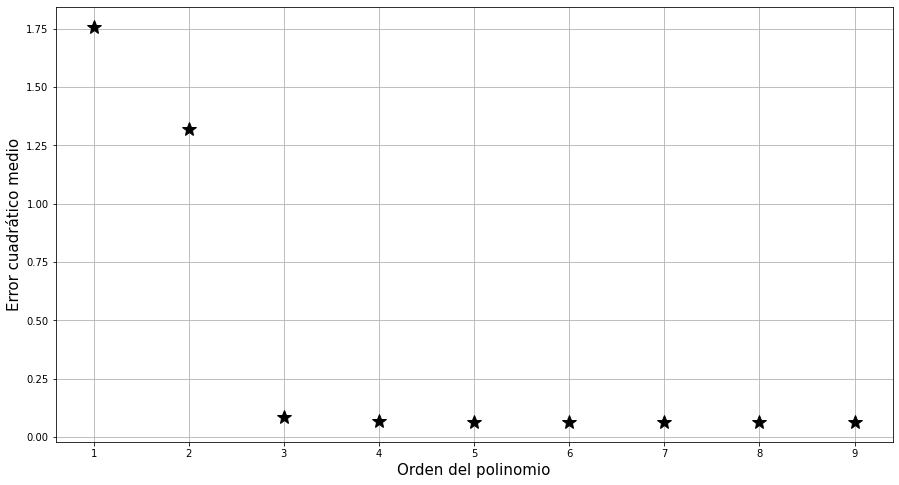

In [50]:
plt.figure(figsize=(15,8))

plt.plot(np.arange(9)+1, e_ms, '*k', ms=15)

plt.xlabel('Orden del polinomio', fontsize=15)
plt.ylabel('Error cuadrático', fontsize=15)

plt.grid()
plt.show()

In [51]:
e_ms

[1.7578324235491023,
 1.3202083960253683,
 0.08739719021145347,
 0.0705575468182631,
 0.06608035813764729,
 0.06454246409383549,
 0.06478929217313148,
 0.06502746922376978,
 0.0646027662593408]

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [38]:
#Definir función objetivo y solucionar problema


In [39]:
# Solucionar

# Mostrar parámetros beta


In [40]:
# Generar curva ajusta

# Generar gráfico


#Agregar puntos, recta, parábola y pol. cúbico ajustados


### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [65]:
#Definir función objetivo y solucionar problema
def objn_ridge(beta, x, y, n):
    lam = 0.01
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y - yhat 
    sum_e = np.sum(e**2)
    return sum_e + lam*np.linalg.norm(beta,2)**2

beta_inicial = np.zeros(7)

sol_ridge = opt.minimize(objn_lasso, beta_inicial, args=(xnorm, ynorm,6))
sol_ridge
beta_ridge = sol_ridge.x

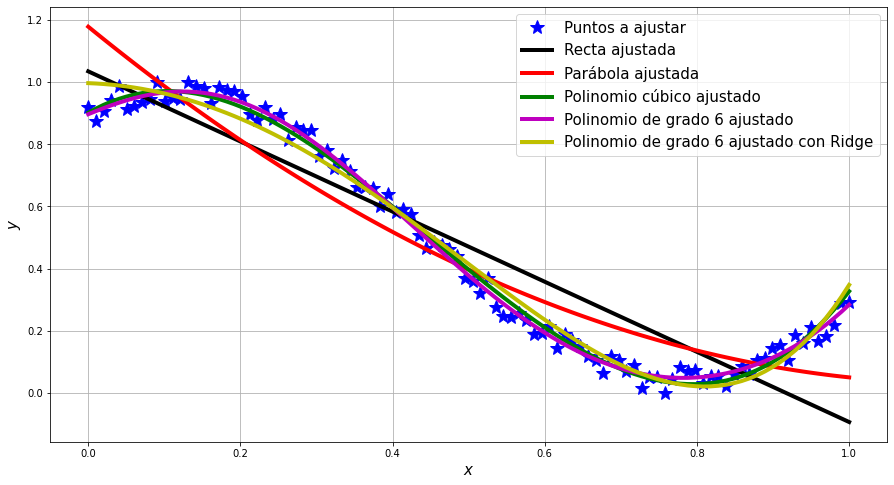

In [66]:
# Generar curva de grado 6 ajusta
yhatridge = beta_ridge.dot([xnorm**i for i in range(7)])

# Generar gráfico
plt.figure(figsize=(15,8))

#Agregar puntos y recta ajustada
plt.plot(xnorm, ynorm, '*b', ms=15, label='Puntos a ajustar')
plt.plot(xnorm, yhat1, 'k', lw=4, label='Recta ajustada')
plt.plot(xnorm, yhat2, 'r', lw=4, label='Parábola ajustada')
plt.plot(xnorm, yhat3, 'g', lw=4, label='Polinomio cúbico ajustado')
plt.plot(xnorm, yhat6, 'm', lw=4, label='Polinomio de grado 6 ajustado')
plt.plot(xnorm, yhatridge, 'y', lw=4, label='Polinomio de grado 6 ajustado con Ridge')

# Etiquetas de los ejes
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.grid()
plt.legend(loc='best', fontsize=15)
plt.show()

## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 9 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado de polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.01.
4. Comparar los beta obtenidos del grado seleccionado.

In [43]:
def f(x):
    return np.sinc(x)

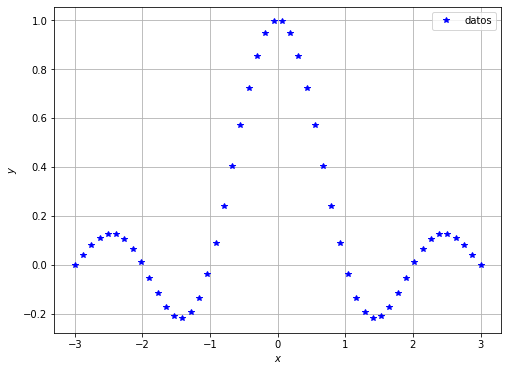

In [44]:
x1 = np.linspace(-3, 3)
y1 = f(x1)

plt.figure(figsize=(8,6))
plt.plot(x1, y1, '*b', label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga
</footer>